# Local Ternary Pattern

by : Fadhil Yori Hibatullah (2103161037) - 2 D3 IT B

----------------------------------------

## Import Library

In [1]:
import cv2 # OpenCV
import numpy as np # NumPy
from matplotlib import pyplot as plt # Matplotlib

## Mendefinisikan Fungsi

### Fungsi untuk mendapatkan nilai pinggir untuk lbp pada gambar

In [2]:
def get_pixel(img, center, x, y):
    t = 5 # Threshold
    new_value = 0
    try:
        if img[x][y] > (center + t):
            new_value = 1
        elif img[x][y] < (center + t) and img[x][y] > (center - t):
            new_value = 0
        elif img[x][y] < (center - t):
            new_value = -1
    except:
        pass
    return new_value

### Fungsi untuk menghitung lbp pada pixel

In [3]:
def ltp_calculated_pixel(img, x, y):
    """
    Format : 
    
     64 | 128 |   1
    ----------------
     32 |   0 |   2
    ----------------
     16 |   8 |   4    
    """    
    center = img[x][y]
    val_ar = []
    val_up = []
    val_low = []
    val_ar.append(get_pixel(img, center, x-1, y+1))     # top_right
    val_ar.append(get_pixel(img, center, x, y+1))       # right
    val_ar.append(get_pixel(img, center, x+1, y+1))     # bottom_right
    val_ar.append(get_pixel(img, center, x+1, y))       # bottom
    val_ar.append(get_pixel(img, center, x+1, y-1))     # bottom_left
    val_ar.append(get_pixel(img, center, x, y-1))       # left
    val_ar.append(get_pixel(img, center, x-1, y-1))     # top_left
    val_ar.append(get_pixel(img, center, x-1, y))       # top
    
    # Classification upper and lower pattern
    for value in val_ar:
        if value == 1:
            val_up.append(1)
            val_low.append(0)
        elif value == -1:
            val_up.append(0)
            val_low.append(1)
        elif value == 0:
            val_up.append(0)
            val_low.append(0)
    
    power_val = [1, 2, 4, 8, 16, 32, 64, 128]
    valUp = 0
    valLow = 0
    for i in range(len(val_up)):
        valUp += val_up[i] * power_val[i]
    for i in range(len(val_low)):
        valLow += val_low[i] * power_val[i]
    result = [valUp, valLow]
    return result  

### Fungsi untuk menampilkan output

In [4]:
def show_output(output_list):
    output_list_len = len(output_list)
    figure = plt.figure(figsize=(20, 6))
    for i in range(output_list_len):
        current_dict = output_list[i]
        current_img = current_dict["img"]
        current_xlabel = current_dict["xlabel"]
        current_ylabel = current_dict["ylabel"]
        current_xtick = current_dict["xtick"]
        current_ytick = current_dict["ytick"]
        current_title = current_dict["title"]
        current_type = current_dict["type"]
        current_plot = figure.add_subplot(1, output_list_len, i+1)
        if current_type == "gray":
            current_plot.imshow(current_img, cmap = plt.get_cmap('gray'))
            current_plot.set_title(current_title)
            current_plot.set_xticks(current_xtick)
            current_plot.set_yticks(current_ytick)
            current_plot.set_xlabel(current_xlabel)
            current_plot.set_ylabel(current_ylabel)
        elif current_type == "histogram":
            current_plot.plot(current_img, color = "black")
            current_plot.set_xlim([0,260])
            current_plot.set_title(current_title)
            current_plot.set_xlabel(current_xlabel)
            current_plot.set_ylabel(current_ylabel)            
            ytick_list = [int(i) for i in current_plot.get_yticks()]
            current_plot.set_yticklabels(ytick_list,rotation = 90)
        elif current_type == "normal":
            current_plot.imshow(current_img)
            current_plot.set_title(current_title)
            current_plot.set_xticks(current_xtick)
            current_plot.set_yticks(current_ytick)
            current_plot.set_xlabel(current_xlabel)
            current_plot.set_ylabel(current_ylabel)

    plt.show()

### Function for progress bar

In [5]:
def log_progress(sequence, every=None, size=None, name='Items'):
    from ipywidgets import IntProgress, HTML, VBox
    from IPython.display import display

    is_iterator = False
    if size is None:
        try:
            size = len(sequence)
        except TypeError:
            is_iterator = True
    if size is not None:
        if every is None:
            if size <= 200:
                every = 1
            else:
                every = int(size / 200)     # every 0.5%
    else:
        assert every is not None, 'sequence is iterator, set every'

    if is_iterator:
        progress = IntProgress(min=0, max=1, value=1)
        progress.bar_style = 'info'
    else:
        progress = IntProgress(min=0, max=size, value=0)
    label = HTML()
    box = VBox(children=[label, progress])
    display(box)

    index = 0
    try:
        for index, record in enumerate(sequence, 1):
            if index == 1 or index % every == 0:
                if is_iterator:
                    label.value = '{name}: {index} / ?'.format(
                        name=name,
                        index=index
                    )
                else:
                    progress.value = index
                    label.value = u'{name}: {index} / {size}'.format(
                        name=name,
                        index=index,
                        size=size
                    )
            yield record
    except:
        progress.bar_style = 'danger'
        raise
    else:
        progress.bar_style = 'success'
        progress.value = index
        label.value = "{name}: {index}".format(
            name=name,
            index=str(index or '?')
        )

### Fungsi main

In [6]:
image_file = 'lenna.jpg'
img_bgr = cv2.imread(image_file)
height, width, channel = img_bgr.shape
img_gray = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2GRAY)
    
img_ltp_up = np.zeros((height, width,3), np.uint8)
img_ltp_low = np.zeros((height, width,3), np.uint8)
for i in log_progress(range(0, height), name="Calculating (step)"):
    for j in range(0, width):
        result = ltp_calculated_pixel(img_gray, i, j)
        img_ltp_up[i, j] = result[0]
        img_ltp_low[i, j] = result[1]
print("LTP Program is finished")

LTP Program is finished


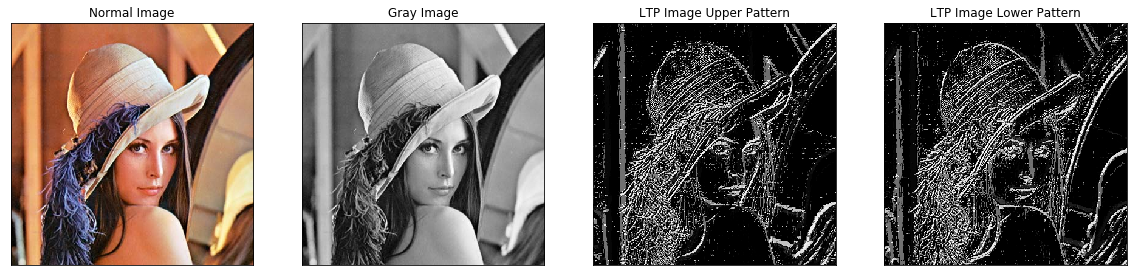

In [7]:
# hist_ltp = cv2.calcHist([img_lbp], [0], None, [256], [0, 256])
output_list = []
output_list.append({"img": cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB),
                    "xlabel": "",
                    "ylabel": "",
                    "xtick": [],
                    "ytick": [],
                    "title": "Normal Image",
                    "type": "normal"
                   })
output_list.append({"img": img_gray,
                    "xlabel": "",
                    "ylabel": "",
                    "xtick": [],
                    "ytick": [],
                    "title": "Gray Image",
                    "type": "gray"
                   })
output_list.append({"img": img_ltp_up,
                    "xlabel": "",
                    "ylabel": "",
                    "xtick": [],
                    "ytick": [],
                    "title": "LTP Image Upper Pattern",
                    "type": "gray"
                   })
output_list.append({"img": img_ltp_low,
                    "xlabel": "",
                    "ylabel": "",
                    "xtick": [],
                    "ytick": [],
                    "title": "LTP Image Lower Pattern",
                    "type": "gray"
                   })
# output_list.append({"img": hist_lbp,
#                     "xlabel": "Bins",
#                     "ylabel": "Number of pixels",
#                     "xtick": None,
#                     "ytick": None,
#                     "title": "Histogram(LBP)",
#                     "type": "histogram"
#                    })
show_output(output_list)                             
cv2.waitKey(0)
cv2.destroyAllWindows()

### Change brightness function

In [8]:
def brighter(nilai, img):
    img_b = np.zeros((height, width,3), np.uint8)
    for y in range(0, height):
        for x in range(0, width):
            red = img[y][x][2] + nilai
            green = img[y][x][1] + nilai
            blue = img[y][x][0] + nilai
            if red > 255:
                red = 255
            if red < 0:
                red = 0
            if green > 255:
                green = 255
            if green < 0:
                green = 0
            if blue > 255:
                blue = 255
            if blue < 0:
                blue = 0
            img_b[y][x] = (red, green, blue)
    return img_b

In [9]:
img_grayBrighter = cv2.cvtColor(brighter(50, img_bgr), cv2.COLOR_BGR2GRAY)
img_ltp_upB = np.zeros((height, width,3), np.uint8)
img_ltp_lowB = np.zeros((height, width,3), np.uint8)
for i in log_progress(range(0, height), name="Calculating (step)"):
    for j in range(0, width):
        result = ltp_calculated_pixel(img_grayBrighter, i, j)
        img_ltp_upB[i, j] = result[0]
        img_ltp_lowB[i, j] = result[1]
print("LTP Program is finished")

LTP Program is finished


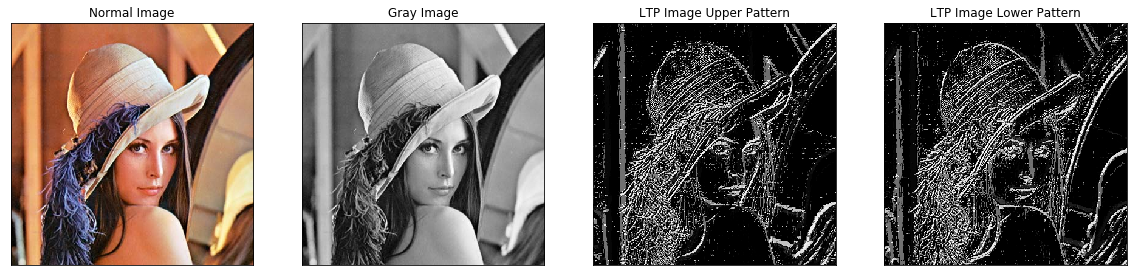

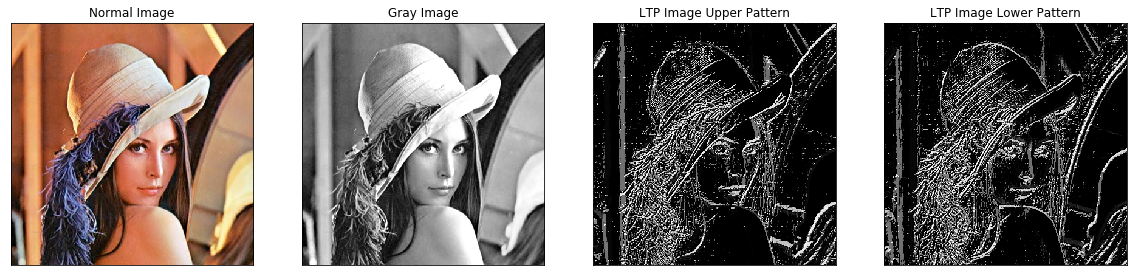

In [10]:
# hist_ltp = cv2.calcHist([img_lbp], [0], None, [256], [0, 256])
output_list2 = []
output_list2.append({"img": cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB),
                    "xlabel": "",
                    "ylabel": "",
                    "xtick": [],
                    "ytick": [],
                    "title": "Normal Image",
                    "type": "normal"
                   })
output_list2.append({"img": img_grayBrighter,
                    "xlabel": "",
                    "ylabel": "",
                    "xtick": [],
                    "ytick": [],
                    "title": "Gray Image",
                    "type": "gray"
                   })
output_list2.append({"img": img_ltp_upB,
                    "xlabel": "",
                    "ylabel": "",
                    "xtick": [],
                    "ytick": [],
                    "title": "LTP Image Upper Pattern",
                    "type": "gray"
                   })
output_list2.append({"img": img_ltp_lowB,
                    "xlabel": "",
                    "ylabel": "",
                    "xtick": [],
                    "ytick": [],
                    "title": "LTP Image Lower Pattern",
                    "type": "gray"
                   })
# output_list.append({"img": hist_lbp,
#                     "xlabel": "Bins",
#                     "ylabel": "Number of pixels",
#                     "xtick": None,
#                     "ytick": None,
#                     "title": "Histogram(LBP)",
#                     "type": "histogram"
#                    })
show_output(output_list)
show_output(output_list2)                             
cv2.waitKey(0)
cv2.destroyAllWindows()

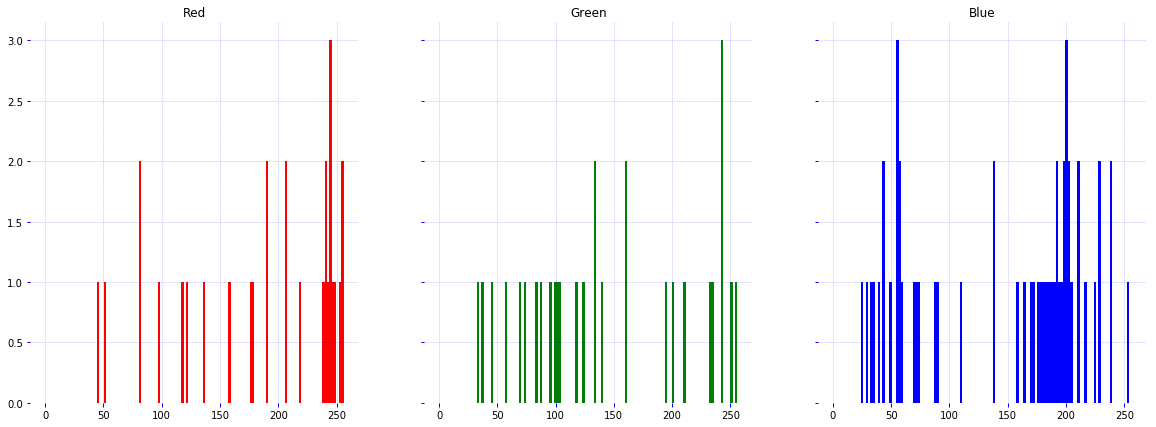

In [14]:
hgr = np.zeros((256))
hgg = np.zeros((256))
hgb = np.zeros((256))

def makeItZero():
    for x in range(0, 256):
        hgr[x] = 0
        hgg[x] = 0
        hgb[x] = 0
        
# for y in range(0, height):
#     for x in range(0, width):
#         red = int(img_bgr[y][x][2])
#         green = int(img_bgr[y][x][1])
#         blue = int(img_bgr[y][x][0])
        
makeItZero()
for y in range(0, img_bgr.shape[0]):
    for x in range(0, img_bgr.shape[1]):
        red = img_bgr[y][x][2]
        green = img_bgr[y][x][1]
        blue = img_bgr[y][x][0]
        hgr[red] += 1
        hgg[green] += 1
        hgb[blue] += 1
        
def plot_result(red, green, blue):
    bins = np.linspace(0, 256, 128)
    
    fig, (ax1, ax2, ax3) = plt.subplots(1, 3, sharey=True)
    
    for ax in [ax1, ax2, ax3]:
        ax.spines["top"].set_visible(False)
        ax.spines["right"].set_visible(False)
        ax.spines["left"].set_visible(False)
        ax.spines["bottom"].set_visible(False)
        ax.grid(color='b', linestyle='--', linewidth=0.5, alpha=0.3)
        ax.tick_params(direction='out', color='b', width='1')
        
    ax1.set_title('Red')
    ax2.set_title('Green')
    ax3.set_title('Blue')

    ax1.hist(red, bins, color="red", alpha=1)
    ax2.hist(green, bins, color="green", alpha=1)
    ax3.hist(blue, bins, color="blue", alpha=1)
    
plt.rcParams['figure.figsize'] = [20, 7]
plot_result(hgr, hgg, hgb)